In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
vandermonde_matrix = np.array([[(i + 1)**j for j in range(4)] for i in range(4)])

In [3]:
vandermonde_matrix

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27],
       [ 1,  4, 16, 64]])

In [4]:
X_viz = TSNE(n_components=2, init='pca').fit_transform(vandermonde_matrix)

/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


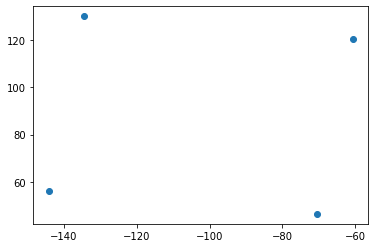

In [5]:
plt.scatter(X_viz[:, 0], X_viz[:, 1])
plt.show()

In [12]:
def equiangular_algorithm(input_dim, truncate_dim=None, alpha=None, A=None):
    if truncate_dim is None:
        truncate_dim = input_dim
    if alpha is None:
        alpha = np.random.uniform(-1 / (input_dim - 1), 1)
    if A is None:
        A = np.eye(input_dim)
    print(f"[INFO] alpha = {alpha:.4f}")
    
    # initialize internal variables
    S = []
    
    s_bar = np.zeros(input_dim)
    r = 0
    v = [S[:, 0], S[:, 0]]
    B = []
    
    for it, k in enumerate(range(1, truncate_dim)):
        print(f"[INFO] Iteration - {it + 1}")
        s_bar = s_bar + S[:, k - 1]
        s = np.divide(s_bar, np.linalg.norm(s_bar))

        q = np.power(np.linalg.norm(v[k].reshape(-1, 1) - (s.reshape(-1, 1) @ s.reshape(1, -1) @ A[:, k].reshape(-1, 1) + r)), -1) *\
        (A[:, k].reshape(-1, 1) - (s.reshape(-1, 1) @ s.reshape(1, -1) @ A[:, k].reshape(-1, 1) + r)); q = q.squeeze()
        
        v_k = q + np.divide(math.sqrt(k) * alpha, math.sqrt((1 - alpha) / (1 + k * alpha)) * s)
        try:
            v[k + 1] = v_k
        except:
            v.append(v_k)
        S[:, k] = np.divide(v[k + 1], np.linalg.norm(v[k + 1]))
        r = 0
        B.append(S.sum(1) - (k - 1) * S[:, k])
        for i in range(k):
            r = r + np.divide(B[i].reshape(-1, 1) @ B[i].reshape(1, -1) @ A[:, k].reshape(-1, 1), np.power(np.linalg.norm(B[i]), 2))
    return S

In [17]:
S = equiangular_algorithm(input_dim=4, truncate_dim=2, A=vandermonde_matrix)

[INFO] alpha = -0.2254
[INFO] Iteration - 1


In [18]:
S

array([[ 0.5       , -0.80679275,  0.03492151,  0.01512896],
       [ 0.5       , -0.53179674,  0.13968606,  0.12103165],
       [ 0.5       , -0.25680072,  0.31429363,  0.40848183],
       [ 0.5       ,  0.01819529,  0.55874424,  0.96825322]])

In [19]:
S_viz = TSNE(n_components=2, init='pca').fit_transform(S)

/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


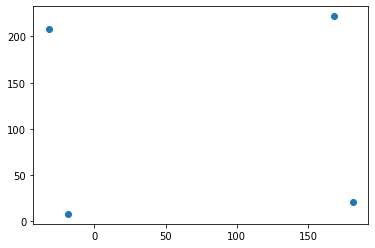

In [20]:
plt.scatter(S_viz[:, 0], S_viz[:, 1])
plt.show()

In [4]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt

import ot
import requests

from io import BytesIO

In [5]:
r = requests.get('https://github.com/PythonOT/POT/raw/master/data/manhattan.npz', stream=True)
data = np.load(BytesIO(r.raw.read()))
bakery_pos = data['bakery_pos']
bakery_prod = data['bakery_prod']
cafe_pos = data['cafe_pos']
cafe_prod = data['cafe_prod']
Imap = data['Imap']
print('Bakery production: {}'.format(bakery_prod))
print('Cafe sale: {}'.format(cafe_prod))
print('Total croissants : {}'.format(cafe_prod.sum()))

Bakery production: [31. 48. 82. 30. 40. 48. 89. 73.]
Cafe sale: [82. 88. 92. 88. 91.]
Total croissants : 441.0


In [7]:
bakery_pos

array([[184.86464733, 201.8163543 ],
       [449.3486663 , 168.40784664],
       [245.41756746, 288.12166576],
       [273.95400109, 364.68282915],
       [494.58935376, 336.8424061 ],
       [738.19305545, 238.70491485],
       [736.10502372, 375.12298779],
       [537.74200949, 482.30861653]])

In [9]:
bakery_prod

array([31., 48., 82., 30., 40., 48., 89., 73.])

In [21]:
bakery_pos.shape, bakery_prod.shape

((8, 2), (8,))

In [10]:
cafe_pos

array([[302.08410452, 442.78633642],
       [345.1162221 , 368.52123027],
       [449.226184  , 201.94529124],
       [454.08464888, 387.95508982],
       [627.60125204, 408.7770822 ]])

In [11]:
cafe_prod

array([82., 88., 92., 88., 91.])

In [22]:
cafe_pos.shape, cafe_prod.shape

((5, 2), (5,))

In [12]:
M = ot.dist(bakery_pos, cafe_pos)

In [14]:
M.shape

(8, 5)

In [15]:
gamma_emd = ot.emd(bakery_prod, cafe_prod, M)

In [16]:
gamma_emd

array([[ 0., 31.,  0.,  0.,  0.],
       [ 0.,  0., 48.,  0.,  0.],
       [52., 30.,  0.,  0.,  0.],
       [30.,  0.,  0.,  0.,  0.],
       [ 0., 27.,  0., 13.,  0.],
       [ 0.,  0., 44.,  2.,  2.],
       [ 0.,  0.,  0.,  0., 89.],
       [ 0.,  0.,  0., 73.,  0.]])

In [17]:
reg = 0.1
K = np.exp(-M / M.max() / reg)
nit = 100
u = np.ones((len(bakery_prod), ))
for i in range(1, nit):
    v = cafe_prod / np.dot(K.T, u)
    u = bakery_prod / (np.dot(K, v))
gamma_sink_algo = np.atleast_2d(u).T * (K * v.T)  # Equivalent to np.dot(np.diag(u), np.dot(K, np.diag(v)))

In [18]:
gamma_sink_algo

array([[1.00416037e+01, 1.37328041e+01, 6.23706638e+00, 9.87724249e-01,
        8.01565086e-04],
       [1.18508628e+00, 5.17394370e+00, 3.75633747e+01, 3.93696614e+00,
        1.40629197e-01],
       [3.46328374e+01, 3.44443592e+01, 7.95769226e+00, 4.95384723e+00,
        1.12638970e-02],
       [1.57915377e+01, 1.08128957e+01, 1.10121003e+00, 2.28536698e+00,
        8.98961254e-03],
       [5.23923322e+00, 9.44592961e+00, 9.70851236e+00, 1.42855701e+01,
        1.32075473e+00],
       [7.63379114e-02, 6.09496306e-01, 2.05898321e+01, 7.25435993e+00,
        1.94699738e+01],
       [3.80308425e-01, 1.29025222e+00, 6.38378250e+00, 1.88121547e+01,
        6.21335022e+01],
       [1.46530554e+01, 1.24903191e+01, 2.45852969e+00, 3.54840107e+01,
        7.91408507e+00]])

In [19]:
gamma_sinkhorn = ot.sinkhorn(bakery_prod, cafe_prod, reg=reg, M=M/M.max())

In [20]:
gamma_sinkhorn

array([[1.00416037e+01, 1.37328041e+01, 6.23706638e+00, 9.87724249e-01,
        8.01565086e-04],
       [1.18508628e+00, 5.17394370e+00, 3.75633747e+01, 3.93696614e+00,
        1.40629197e-01],
       [3.46328374e+01, 3.44443592e+01, 7.95769226e+00, 4.95384723e+00,
        1.12638970e-02],
       [1.57915377e+01, 1.08128957e+01, 1.10121003e+00, 2.28536698e+00,
        8.98961254e-03],
       [5.23923322e+00, 9.44592961e+00, 9.70851236e+00, 1.42855701e+01,
        1.32075473e+00],
       [7.63379114e-02, 6.09496306e-01, 2.05898321e+01, 7.25435993e+00,
        1.94699738e+01],
       [3.80308425e-01, 1.29025222e+00, 6.38378250e+00, 1.88121547e+01,
        6.21335022e+01],
       [1.46530554e+01, 1.24903191e+01, 2.45852969e+00, 3.54840107e+01,
        7.91408507e+00]])